In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
dataset_name = 'BMMC'

s1: 17243
s2: 15226
s3: 14556
s4: 22224

### RNA

In [3]:
rna = sc.read_h5ad("/home/zqzhao/workplace/Multi_omics_unet/dataset/BMMC/rna.h5ad")

In [3]:
rna

AnnData object with n_obs × n_vars = 69249 × 13431
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
rna.obs['batch']

TAGTTGTCACCCTCAC-1-s1d1     s1d1
CTATGGCCATAACGGG-1-s1d1     s1d1
CCGCACACAGGTTAAA-1-s1d1     s1d1
TCATTTGGTAATGGAA-1-s1d1     s1d1
ACCACATAGGTGTCCA-1-s1d1     s1d1
                            ... 
AAACCGCGTTTGAGGC-12-s4d9    s4d9
TGACTTAAGTTCCCGT-12-s4d9    s4d9
GCTGTACCACCGTTCC-12-s4d9    s4d9
ACACTTGCAACTAGAA-12-s4d9    s4d9
CACTTAAAGTCTGGGC-12-s4d9    s4d9
Name: batch, Length: 69249, dtype: category
Categories (13, object): ['s1d1', 's1d2', 's1d3', 's2d1', ..., 's3d10', 's4d1', 's4d8', 's4d9']

In [4]:
y = rna.obs['cell_type'].values
y

['Naive CD20+ B', 'CD14+ Mono', 'CD8+ T', 'CD8+ T', 'CD16+ Mono', ..., 'CD8+ T naive', 'Lymph prog', 'CD8+ T', 'cDC2', 'Naive CD20+ B']
Length: 69249
Categories (22, object): ['B1 B', 'CD4+ T activated', 'CD4+ T naive', 'CD8+ T', ..., 'Proerythroblast', 'Transitional B', 'cDC2', 'pDC']

In [5]:
import matplotlib.pyplot as plt

In [6]:
sc.pp.filter_genes(rna, min_cells=2,)
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)
sc.pp.highly_variable_genes(rna, n_top_genes=3000, subset=True)
sc.pp.pca(rna, n_comps=40, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(rna, use_rep="X_pca")
sc.tl.umap(rna)

/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


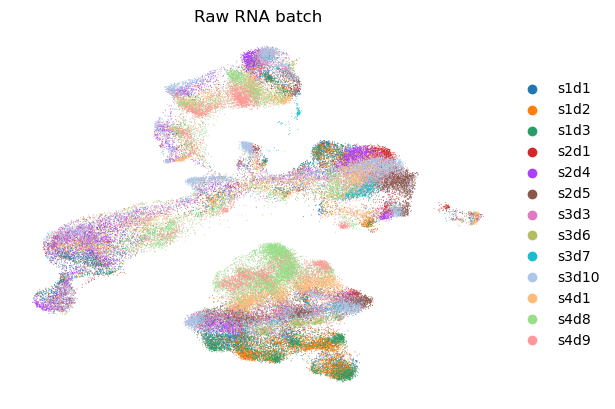

In [7]:
sc.pl.umap(rna, color=["batch"], title='Raw RNA batch', frameon=False, show=False)
plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/rst/{dataset_name}_raw_rna_batch.tif', bbox_inches='tight', dpi=600)

/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


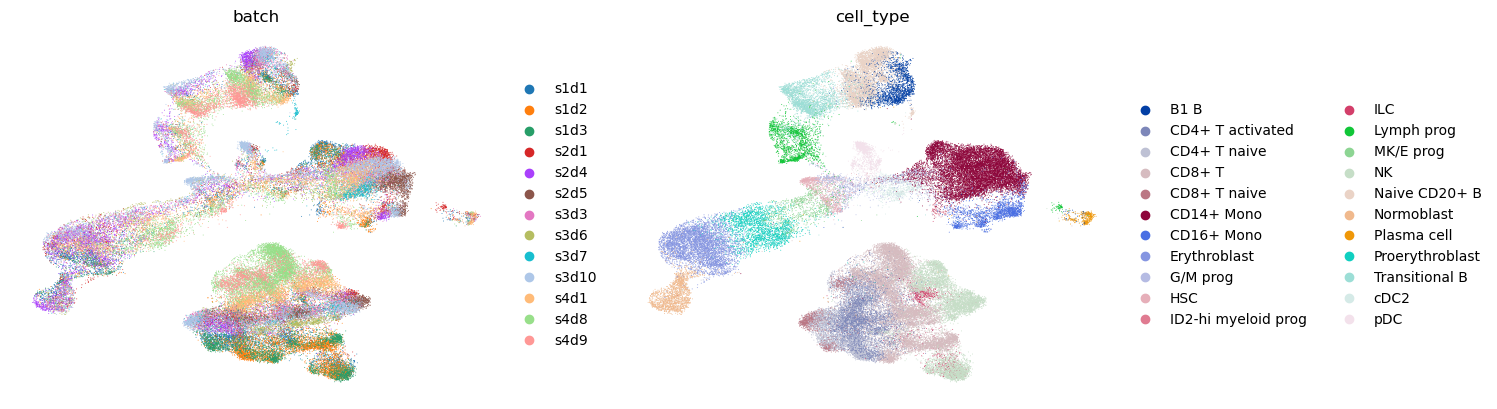

In [12]:
# sc.pl.umap(rna, color=["batch", "cell_type"], ncols=2, frameon=False, show=False)
# plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/rst/{dataset_name}_raw_rna_batch.svg', bbox_inches='tight')

### ATAC

In [8]:
atac = sc.read_h5ad("/home/zqzhao/workplace/Multi_omics_unet/dataset/BMMC/atac.h5ad")

In [9]:
sc.pp.filter_genes(atac, min_cells=10,)
sc.pp.normalize_total(atac, target_sum=1e4)
sc.pp.log1p(atac)
sc.pp.highly_variable_genes(atac, n_top_genes=3000, subset=True)
sc.pp.pca(atac, n_comps=40, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(atac, use_rep="X_pca")
sc.tl.umap(atac)


/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


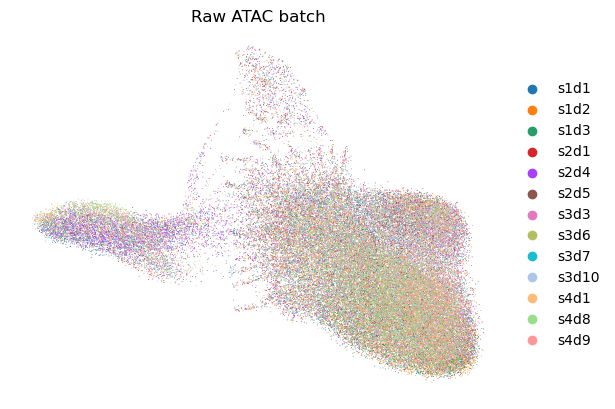

In [10]:
sc.pl.umap(atac, color=["batch"], ncols=1, title='Raw ATAC batch', frameon=False, show=False)
plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/rst/{dataset_name}_raw_atac_batch.tif', bbox_inches='tight', dpi=600)

/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


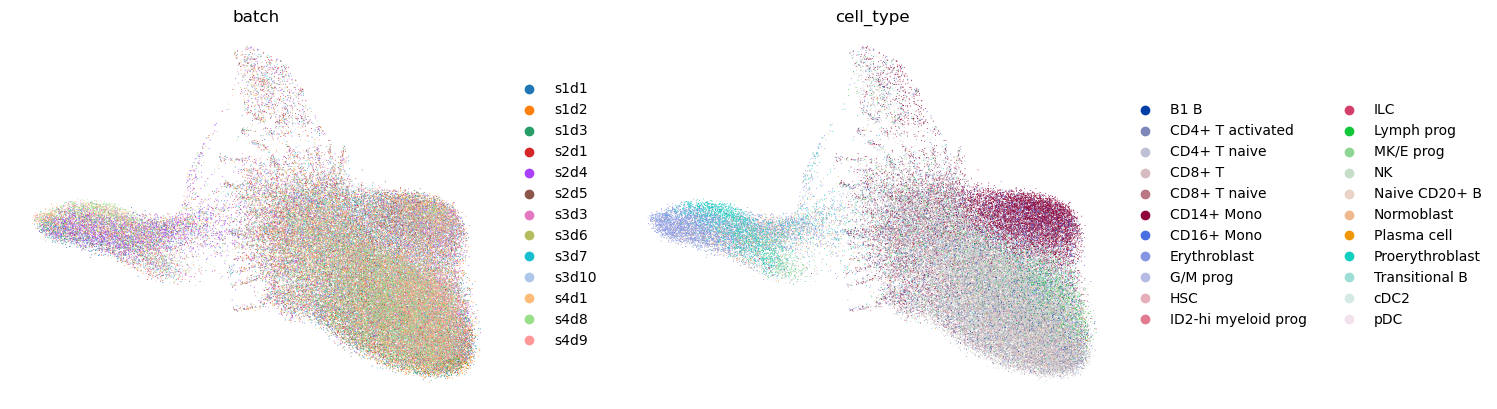

In [15]:
# sc.pl.umap(atac, color=["batch", "cell_type"], ncols=2, frameon=False, show=False)
# plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/rst/{dataset_name}_raw_atac_batch.svg', bbox_inches='tight')

### hidden

In [12]:
hidden = np.load(f'/home/zqzhao/workplace/OSMVC-master/latent/{dataset_name}_glb_vector_all.npy')
hidden.shape

(69249, 1024)

In [13]:
pred = np.load(f'/home/zqzhao/workplace/OSMVC-master/latent/{dataset_name}_target_pred_all.npy')

In [14]:
hidden = sc.AnnData(X=hidden)
sc.pp.neighbors(hidden, use_rep="X")
sc.tl.umap(hidden)

In [15]:
adata = rna.copy()
adata.obsm = hidden.obsm

/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


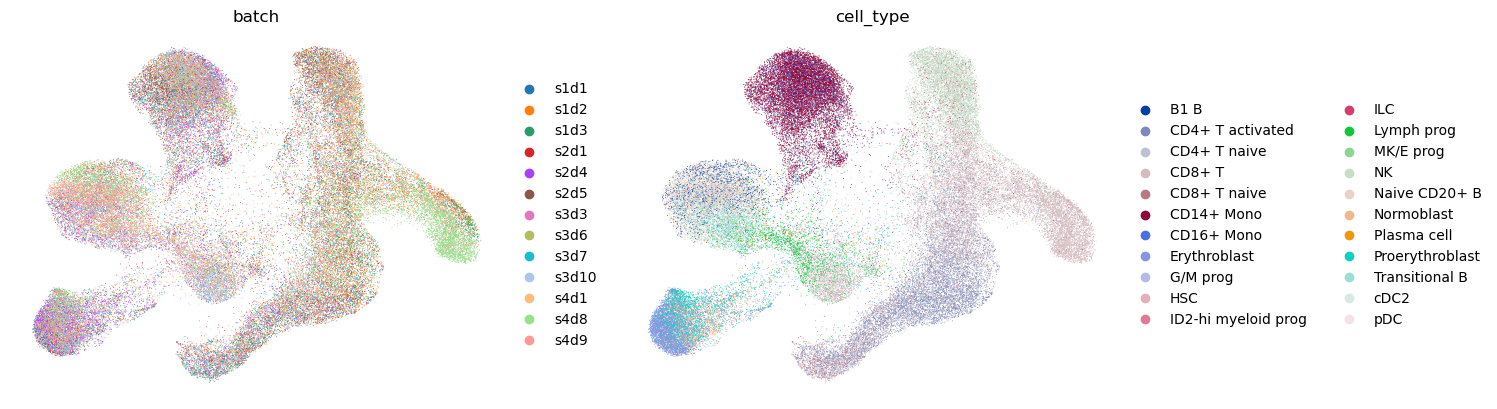

In [16]:
sc.pl.umap(adata, color=["batch", "cell_type"], ncols=2, frameon=False, show=False)
plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/rst/{dataset_name}_batch.tif', bbox_inches='tight', dpi=600)

/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


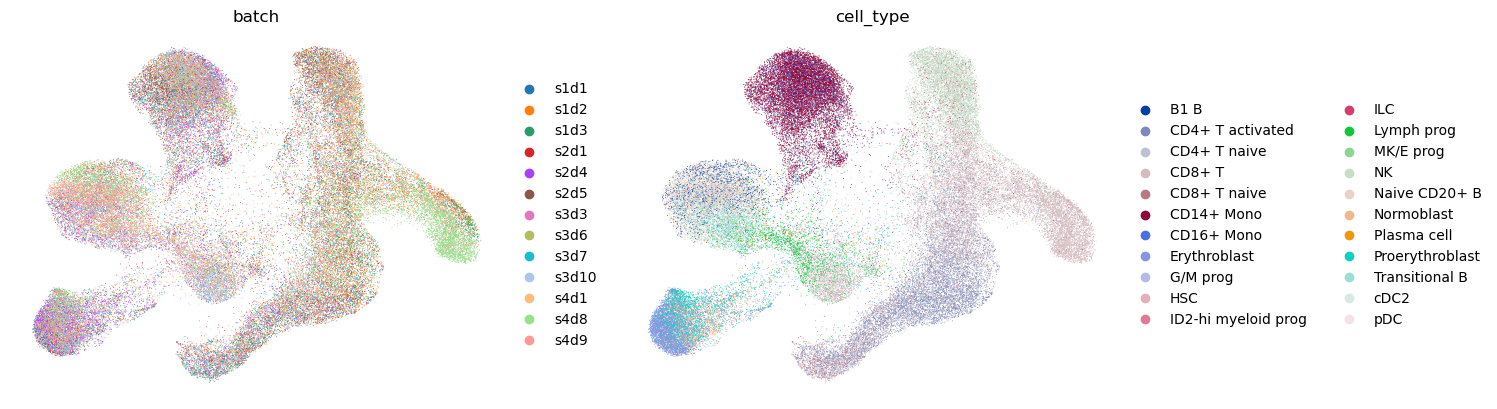

In [16]:
sc.pl.umap(adata, color=["batch", "cell_type"], ncols=2, frameon=False, show=False)
plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/rst/{dataset_name}_batch.svg', bbox_inches='tight')